# Dependencies loading

In [502]:
import pandas as pd
import numpy as np
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
from matplotlib.ticker import FuncFormatter, LogLocator # Data Visualization
import plotly.express as px # Data Visualization
import statsmodels.api as sm # Statistics
import statsmodels.tsa.api as tsa # Statistics
from scipy.stats import norm, skew, kurtosis # Statistics
from scipy.optimize import minimize # Statistics
from pandas_datareader import data as pdr #import data from FRED
from datetime import datetime # Date and Time
from arch import arch_model # TS

In [503]:
import warnings
warnings.filterwarnings("ignore")

# Data preparation

## Data loading

In [517]:
BTC_url = 'https://raw.githubusercontent.com/IlyaSshnip/RR_project/main/Bitcoin_daily.csv'
SP500_url = 'https://raw.githubusercontent.com/IlyaSshnip/RR_project/main/S&P500.csv'
TMUBMUSD01Y_url = 'https://raw.githubusercontent.com/IlyaSshnip/RR_project/main/TMUBMUSD01Y.csv'

df_BTC = pd.read_csv(BTC_url)
df_BTC.columns = df_BTC.columns.str.strip()

df_SP500 = pd.read_csv(SP500_url)
df_SP500.columns = df_SP500.columns.str.strip()

df_TMUBMUSD01Y = pd.read_csv(TMUBMUSD01Y_url)
df_TMUBMUSD01Y.columns = df_TMUBMUSD01Y.columns.str.strip()

start=datetime(2014, 5, 1)
end=datetime(2024, 5, 1)

# Macroeconomic Indicators (from FRED):

UN_Rate = pdr.get_data_fred('UNRATE', start, end) # Unemployment Rate
Real_GDP = pdr.get_data_fred('A191RL1Q225SBEA', start, end) # Real GDP
CPI = pdr.get_data_fred('CPIAUCSL', start, end) # Consumer Price Index
VIX = pdr.get_data_fred('VIXCLS', start, end) # Volatility Index
Ten_Year_Treasury_Yield = pdr.get_data_fred('DGS10', start, end) # 10-Year Treasury Yield
Federal_Funds_Rate = pdr.get_data_fred('FEDFUNDS', start, end) # Federal Funds Rate
BBB_Credit_Spread = pdr.get_data_fred('BAMLC0A4CBBB', start, end) # BBB Credit Spread

# print(df_BTC.head())
# print(df_SP500.head())
# print(df_TMUBMUSD01Y.head())
# print(UN_Rate.head())
# print(Real_GDP.head())
# print(CPI.head())
# print(VIX.head())
# print(Ten_Year_Treasury_Yield.head())
# print(Federal_Funds_Rate.head())
# print(BBB_Credit_Spread.head())

## Dataset adjustment

In [518]:
# Select Columns
df_SP500 = df_SP500[['Date', 'Close']].rename(columns={'Close': 'Price'})
df_BTC = df_Bitcoin[['Date', 'Price']]
df_TMUBMUSD01Y = df_TMUBMUSD01Y[['Date', 'Close']].rename(columns={'Close': 'Price'})

########################################################################################

# Define Price as 'numeric'

df_SP500['Price'] = df_SP500['Price'].astype(str)
df_BTC['Price'] = df_BTC['Price'].astype(str)
df_TMUBMUSD01Y['Price'] = df_TMUBMUSD01Y['Price'].astype(str)

df_SP500['Price'] = pd.to_numeric(df_SP500['Price'].str.replace(',', ''), errors='coerce')
df_BTC['Price'] = pd.to_numeric(df_BTC['Price'].str.replace(',', ''), errors='coerce')
df_TMUBMUSD01Y['Price'] = pd.to_numeric(df_TMUBMUSD01Y['Price'].str.replace(',', ''), errors='coerce')

########################################################################################

# Date
df_SP500['Date'] = pd.to_datetime(df_SP500['Date'])
df_SP500.set_index('Date', inplace=True)

df_BTC['Date'] = pd.to_datetime(df_Bitcoin['Date'])
df_BTC.set_index('Date', inplace=True)

df_TMUBMUSD01Y['Date'] = pd.to_datetime(df_TMUBMUSD01Y['Date'])
df_TMUBMUSD01Y.set_index('Date', inplace=True)

# Sort by Date
df_SP500.sort_index(inplace=True)
df_BTC.sort_index(inplace=True)
df_TMUBMUSD01Y.sort_index(inplace=True)

df_SP500 = df_SP500.loc[start_date:end_date]
df_BTC = df_BTC.loc[start_date:end_date] # Cryptocurrency market is open on weekends
df_TMUBMUSD01Y = df_TMUBMUSD01Y.loc[start_date:end_date]

########################################################################################

# print(df_SP500.head())
# print(df_SP500.tail()) 
# print(df_TMUBMUSD01Y.head())
# print(df_TMUBMUSD01Y.tail())
# print(df_BTC.tail())

                  Price
Date                   
2014-05-01  1883.680054
2014-05-02  1881.140015
2014-05-05  1884.660034
2014-05-06  1867.719971
2014-05-07  1878.209961
                  Price
Date                   
2024-04-24  5071.629883
2024-04-25  5048.419922
2024-04-26  5099.959961
2024-04-29  5116.169922
2024-04-30  5035.689941
            Price
Date             
2014-05-01  0.104
2014-05-02  0.104
2014-05-05  0.102
2014-05-06  0.102
2014-05-07  0.099
            Price
Date             
2024-04-24  5.155
2024-04-25  5.209
2024-04-26  5.196
2024-04-29  5.195
2024-04-30  5.244
              Price
Date               
2024-04-26  63766.4
2024-04-27  63456.8
2024-04-28  63109.7
2024-04-29  63860.1
2024-04-30  60666.6


## Returns (Daily) calculation

In [448]:
df_SP500['Return'] = df_SP500['Price'].pct_change() * 100
df_BTC['Return'] = df_BTC['Price'].pct_change() * 100
df_TMUBMUSD01Y['Return'] = df_TMUBMUSD01Y['Price'].pct_change() * 100

#print(df_SP500.head())
#print(df_TMUBMUSD01Y.head())
#print(df_BTC.head())

# Exploratory Data Analysis

## Summary Statistics

In [556]:
print(df_SP500.describe())
print(df_BTC.describe())
print(df_TMUBMUSD01Y.describe())

             Price       Return
count  3653.000000  3652.000000
mean   3111.394135     0.000517
std     945.078892     0.011057
min    1829.079956    -0.119841
25%    2181.739990    -0.003733
50%    2862.959961     0.000700
75%    3998.949951     0.005653
max    5254.350098     0.093828
              Price       Return
count   3653.000000  3652.000000
mean   15429.602245     0.002026
std    17681.737231     0.036928
min      164.900000    -0.391816
25%      704.300000    -0.012350
50%     8184.900000     0.001215
75%    26249.800000     0.017040
max    73066.300000     0.272286
             Price       Return
count  3653.000000  3652.000000
mean      1.656095     0.024737
std       1.697422     0.558184
min       0.005000    -0.934211
25%       0.216000    -0.010885
50%       1.068000     0.000000
75%       2.452000     0.013848
max       5.515000    14.200000


## Check for Missing Values

In [557]:
print(df_SP500.isnull().sum())
print(df_BTC.isnull().sum())
print(df_TMUBMUSD01Y.isnull().sum())

Price     0
Return    1
dtype: int64
Price     0
Return    1
dtype: int64
Price     0
Return    1
dtype: int64


## Price Changes of the S&P 500 Index, Bitcoin, and the 1-Year U.S. Treasury Bond

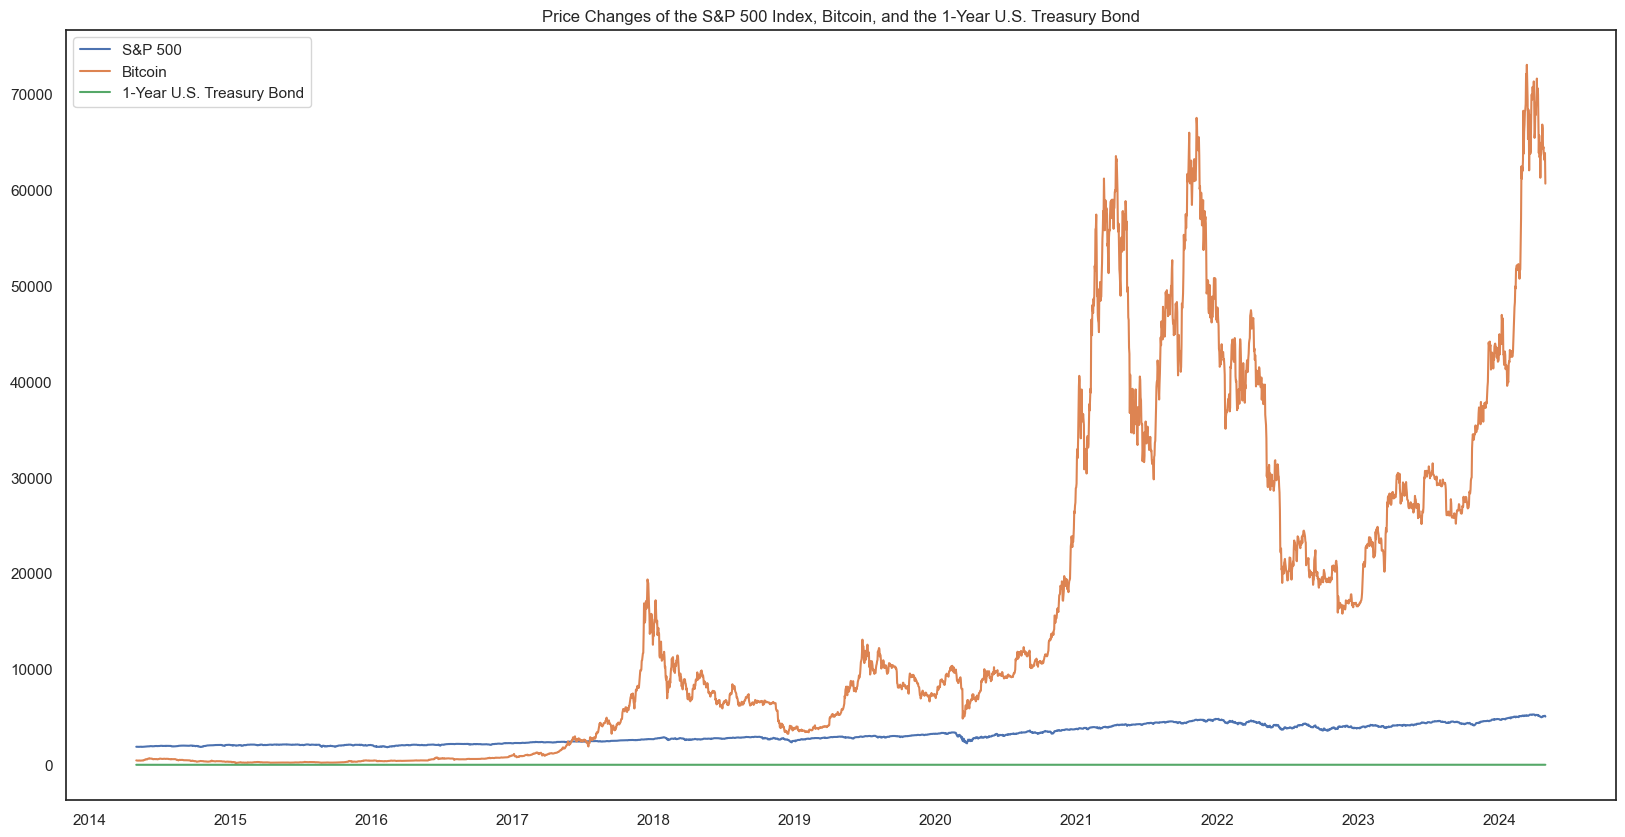

In [558]:
plt.figure(figsize=(20, 10))

plt.plot(df_SP500.index, df_SP500['Price'], label='S&P 500')
plt.plot(df_BTC.index, df_BTC['Price'], label='Bitcoin')
plt.plot(df_TMUBMUSD01Y.index, df_TMUBMUSD01Y['Price'], label='1-Year U.S. Treasury Bond')

plt.xlabel('')
plt.ylabel('')
plt.title('Price Changes of the S&P 500 Index, Bitcoin, and the 1-Year U.S. Treasury Bond')
plt.legend()
plt.grid(False)
plt.show()

### S&P 500 Index

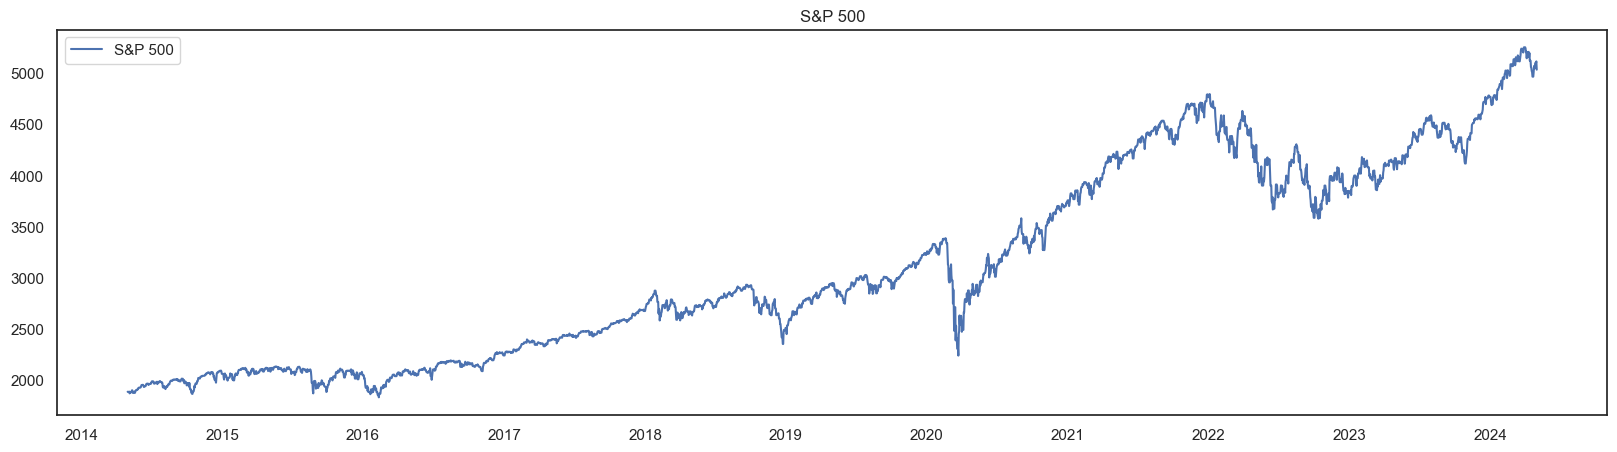

In [559]:
plt.figure(figsize=(20, 5))
plt.plot(df_SP500.index, df_SP500['Price'], label='S&P 500')
plt.xlabel('')
plt.ylabel('')
plt.title('S&P 500')
plt.legend()
plt.grid(False)
plt.show()

### Bitcoin

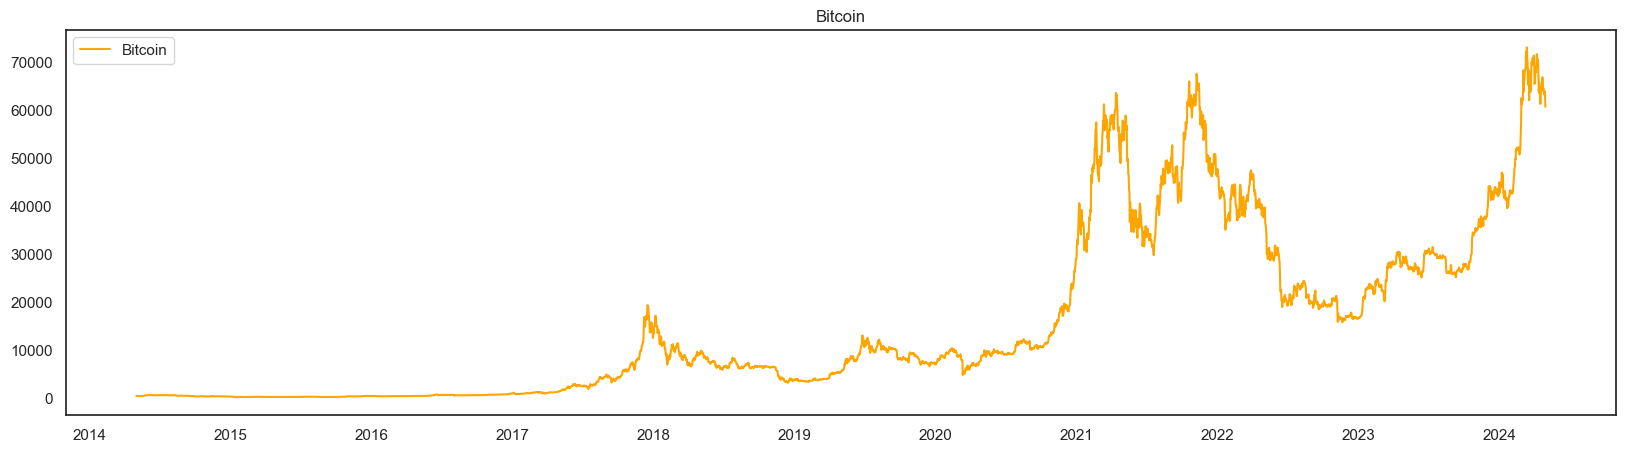

In [560]:
plt.figure(figsize=(20, 5))
plt.plot(df_BTC.index, df_BTC['Price'], label='Bitcoin', color='orange')
plt.xlabel('')
plt.ylabel('')
plt.title('Bitcoin')
plt.legend()
plt.grid(False)
plt.show()

### 1-Year U.S. Treasury Bond

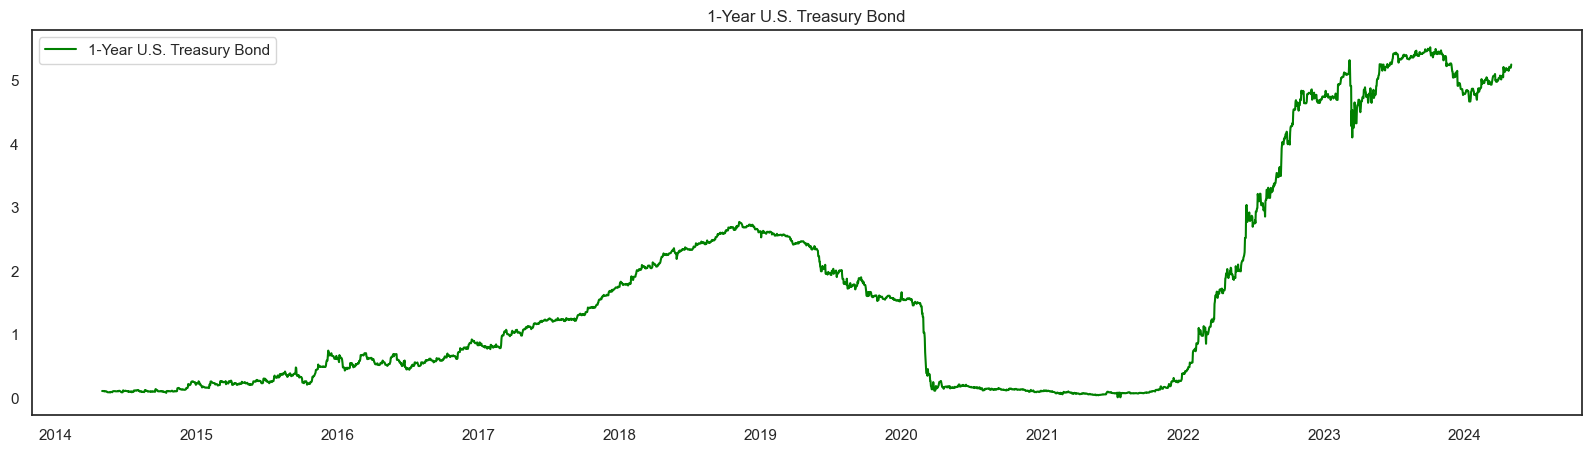

In [561]:
plt.figure(figsize=(20, 5))
plt.plot(df_TMUBMUSD01Y.index, df_TMUBMUSD01Y['Price'], label='1-Year U.S. Treasury Bond', color='green')
plt.xlabel('')
plt.ylabel('')
plt.title('1-Year U.S. Treasury Bond')
plt.legend()
plt.grid(False)
plt.show()

## Daily Returns

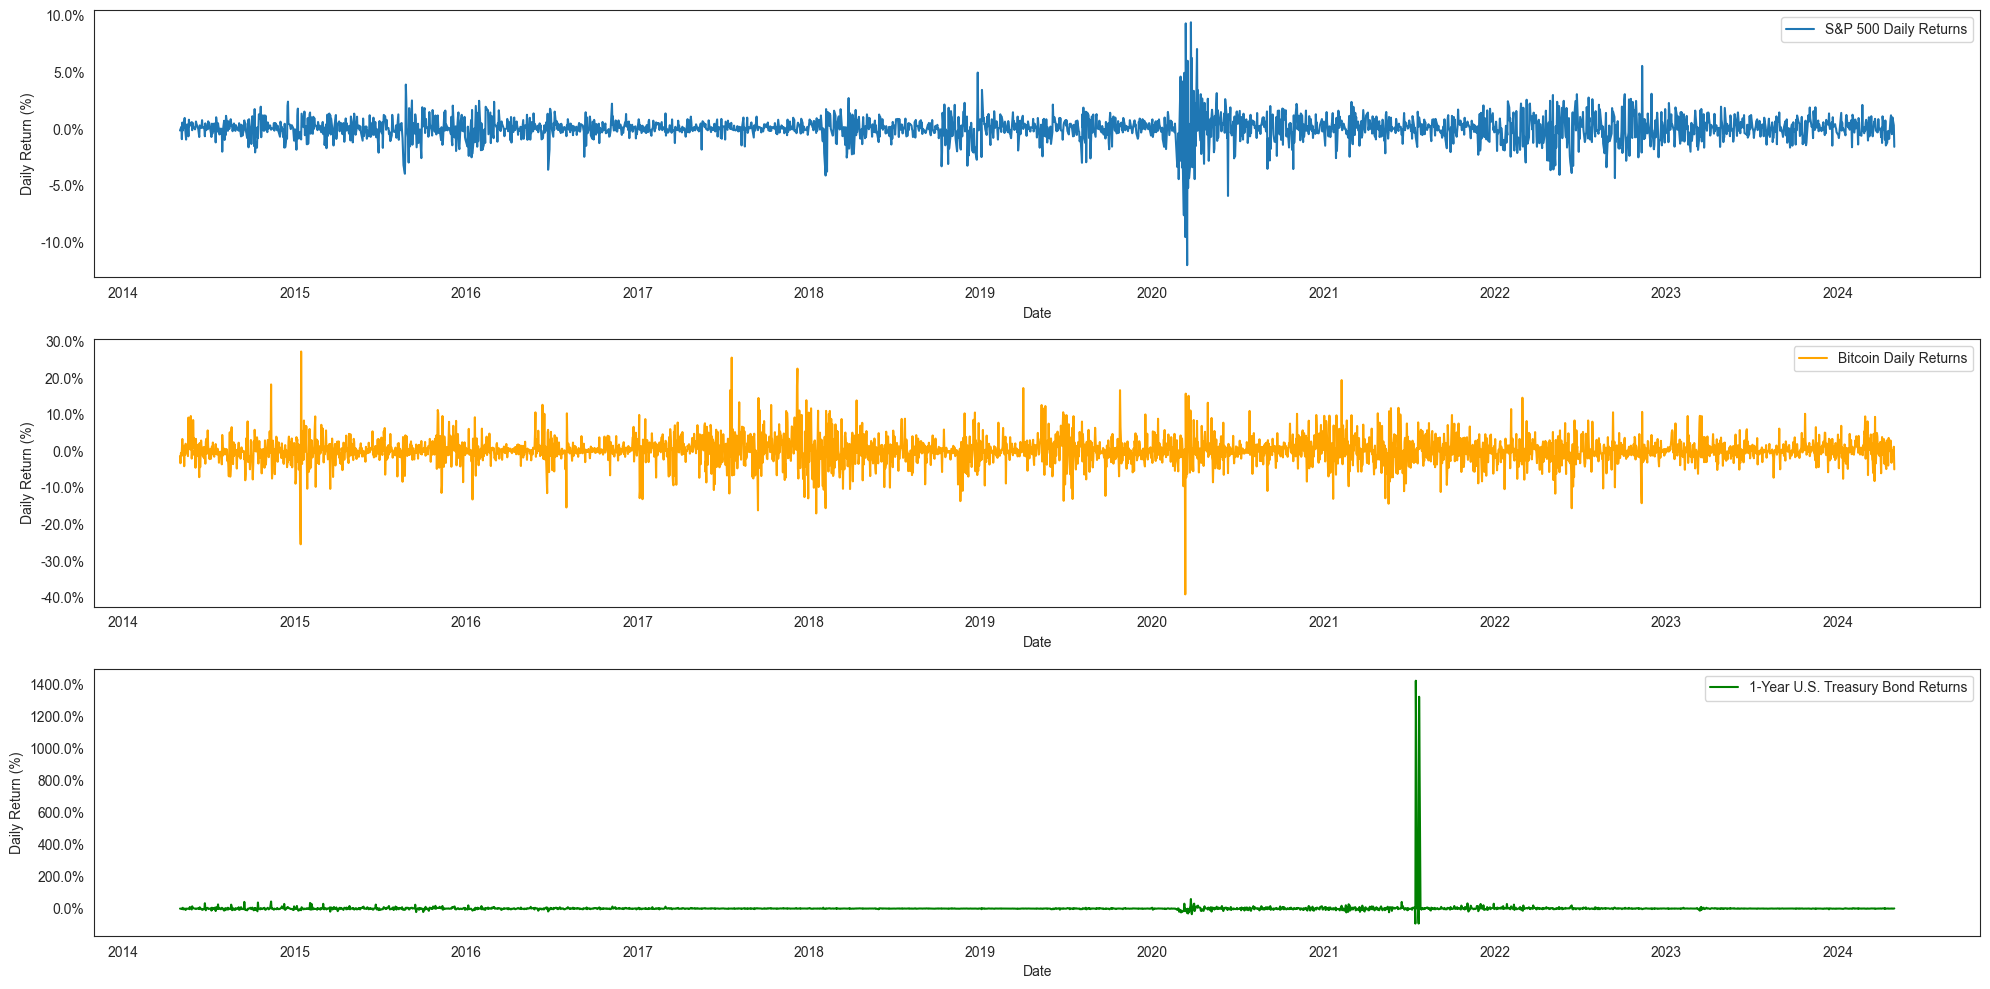

In [449]:
def percentage_formatter(x, pos):
    return f'{x:.1f}%'

plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.plot(df_SP500.index, df_SP500['Return'], label='S&P 500 Daily Returns')
plt.title('')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_BTC.index, df_BTC['Return'], label='Bitcoin Daily Returns', color='orange')
plt.title('')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_TMUBMUSD01Y.index, df_TMUBMUSD01Y['Return'], label='1-Year U.S. Treasury Bond Returns', color='green')
plt.title('')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.legend()

plt.tight_layout()
plt.show()

### Correlation

In [554]:
""" Forward-filling missing values ensures consistency gaps 
by filling gaps with the last available observation, which is essential 
when aligning datasets with different trading schedules
, such as traditional markets and Bitcoin (Open on Weekends)."""

# This piece of code was taken from ChapGPT 
# Recommended using Forward-filling for Bitcoin

df_SP500 = df_SP500.asfreq('D').fillna(method='ffill')
df_TMUBMUSD01Y = df_TMUBMUSD01Y.asfreq('D').fillna(method='ffill')

# Merge files & Rename Columns
df_assets = pd.merge(df_SP500, df_BTC, on='Date', how='outer')
df_assets = pd.merge(df_assets, df_TMUBMUSD01Y, on='Date', how='outer')

df_assets.columns = ['SP500_Price', 'SP500_Return', 'BTC_Price', 'BTC_Return', 'TMUBMUSD01Y_Price', 'TMUBMUSD01Y_Return']

# Drop NaN
df_assets.dropna(subset=['SP500_Return', 'BTC_Return', 'TMUBMUSD01Y_Return'], inplace=True)

# print(df_assets.head())

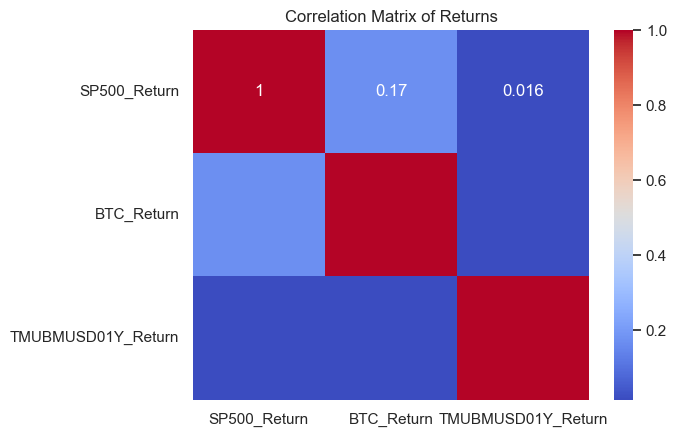

In [555]:
correlation_matrix = df_assets[['SP500_Return', 'BTC_Return', 'TMUBMUSD01Y_Return']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Returns')
plt.show()

The correlation matrix shows that S&P 500 and Bitcoin returns have a weak positive correlation (0.17), while both have minimal correlation with 1-Year U.S. Treasury returns.

## Statistical Analysis